# Material de Geofísica - Ondas e sinal geofísico no domínio da frequência
#### Curso de Geologia - Geofísica Aplicada I - 2o Semestre 2024
Profa. Luizemara Szameitat
![Banner USP](https://raw.githubusercontent.com/lszam/geofex/main/assets/img/banner_usp.png)

OBJETIVO: fixar os conceitos de comprimento de onda, amplitude e frequência, e se familiarizar com o termo "domínio da frequência". Este conteúdo é essencial para o bom entendimento do conteúdo que se seguirá na matéria, então vamos lá!

> *Aluno: Insira seu nome na variável "aluno", entre aspas como no exemplo:
aluno = 'Luiz'. A variável "atividade" contém o nome desta atividade. Execute a célula abaixo e as demais clicando no canto superior esquerdo.*


In [1]:
##############
#NOME DO ALUNO
##############
aluno = 'Luiz Carlos'
atividade = 'GA1_Ondas_DominioDaFrequencia'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.fftpack import fft, fftfreq

# 1. Onda senóide

In [3]:
#Propriedades
comprimento_lambda=1
amplitude=1
frequency=1
x_values = np.linspace(0, 2 * comprimento_lambda, 1000)
y_values = amplitude * np.sin(2 * np.pi * frequency * x_values)

Plotar em um gráfico

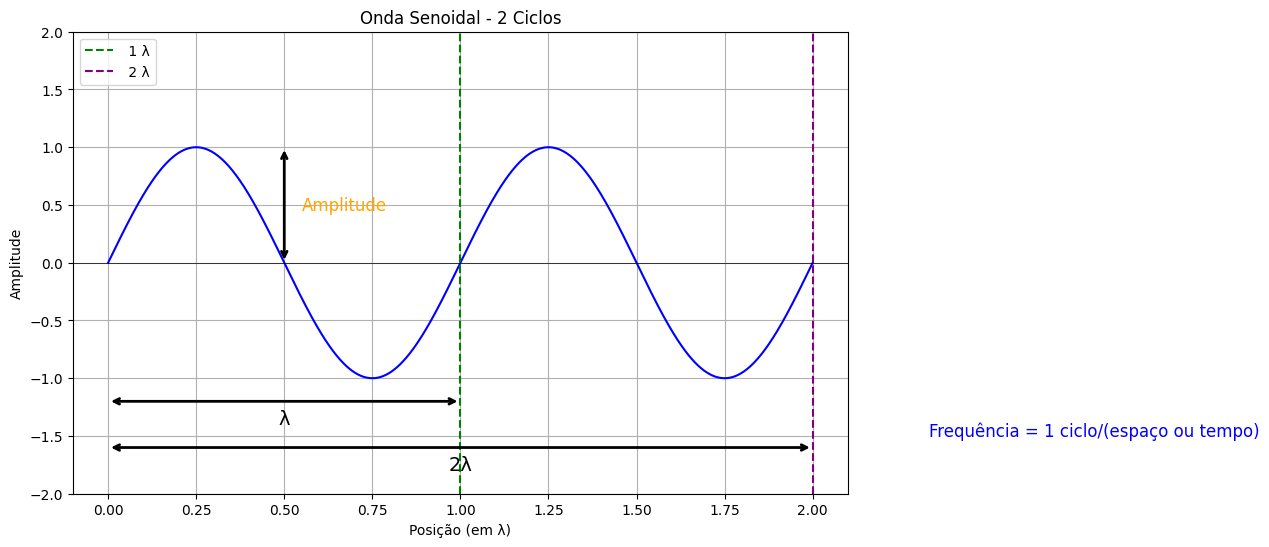

In [4]:
# Criando o gráfico com seta horizontal para representar λ
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='blue')
plt.title("Onda Senoidal - 2 Ciclos")
plt.xlabel("Posição (em λ)")
plt.ylabel("Amplitude")
plt.grid(True)
# Indicações no gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(comprimento_lambda, color='green', linestyle='--', label=' 1 λ')
plt.axvline(2 * comprimento_lambda, color='purple', linestyle='--', label=' 2 λ')

# Setas para λ
plt.annotate('', xy=(0, -1.2), xytext=(comprimento_lambda, -1.2),
             arrowprops=dict(facecolor='green', arrowstyle='<->', lw=2))
plt.text(0.5, -1.4, 'λ', color='black', fontsize=14, ha='center')

plt.annotate('', xy=(0, -1.6), xytext=(comprimento_lambda*2, -1.6),
             arrowprops=dict(facecolor='green', arrowstyle='<->', lw=2))
plt.text(1.0, -1.8, '2λ', color='black', fontsize=14, ha='center')

# Indicação da amplitude como uma linha com setas em ambas as extremidades e na cor laranja
plt.annotate('', xy=(0.5, 0), xytext=(0.5, amplitude),
             arrowprops=dict(facecolor='orange', arrowstyle='<->', lw=2))
plt.text(0.55, 0.5, 'Amplitude', color='orange', fontsize=12, va='center')

# Exibir a frequência
plt.text(2.8, -1.5, f'Frequência = {frequency} ciclo/(espaço ou tempo)', fontsize=12, ha='center', color='blue')

plt.legend()
plt.ylim(-2, 2)
plt.show()


#2. Somatório de ondas senóides

Criando as ondas

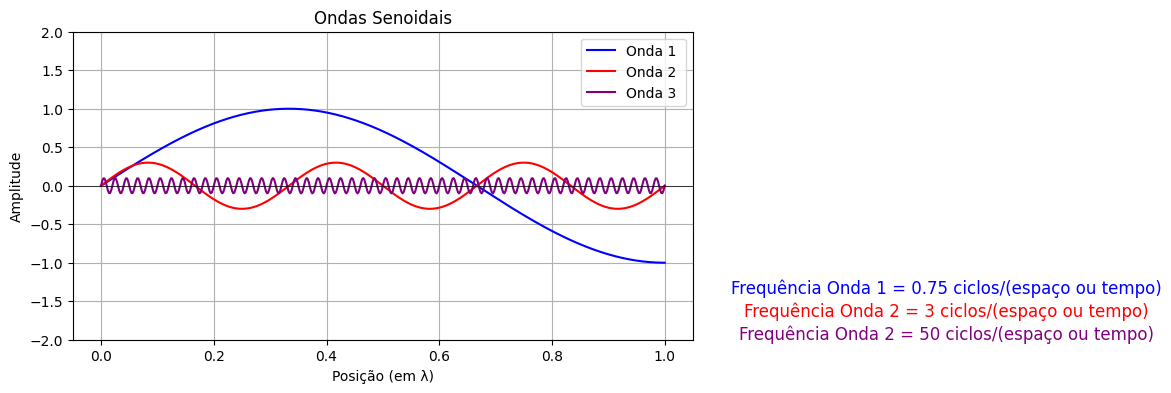

In [5]:
# Neste caso, vamos manter o x do mesmo tamanho para todas as ondas, assim haverá
# sobreposição por toda a extensão do gráfico

x_values = np.linspace(0, 1, 500)

# Primeira onda
amplitude1 = 1
frequencia1 = 0.75
y_values1 = amplitude1 * np.sin(2 * np.pi * frequencia1 * x_values)

# Segunda onda, de maior frequência
amplitude2 = 0.3
frequencia2 = 3
y_values2 = amplitude2 * np.sin(2 * np.pi * frequencia2 * x_values)

# Parâmetros da terceira onda, mais alta frequência
amplitude3 = 0.1
frequencia3 = 50
y_values3 = amplitude3 * np.sin(2 * np.pi * frequencia3 * x_values)


# Gráfico
plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values1, color='blue', label='Onda 1')
plt.plot(x_values, y_values2, color='red', label='Onda 2 ')
plt.plot(x_values, y_values3, color='purple', label='Onda 3 ')
plt.title("Ondas Senoidais")
plt.xlabel("Posição (em λ)")
plt.ylabel("Amplitude")
plt.grid(True)
# Zero no gráfico
plt.axhline(0, color='black', linewidth=0.5)
# Frequência
plt.text(1.5, -1.4, f'Frequência Onda 1 = {frequencia1} ciclos/(espaço ou tempo)', fontsize=12, ha='center', color='blue')
plt.text(1.5, -1.7, f'Frequência Onda 2 = {frequencia2} ciclos/(espaço ou tempo)', fontsize=12, ha='center', color='red')
plt.text(1.5, -2, f'Frequência Onda 2 = {frequencia3} ciclos/(espaço ou tempo)', fontsize=12, ha='center', color='purple')
plt.legend()
plt.ylim(-2, 2)
plt.show()


Plotando em um gráfico

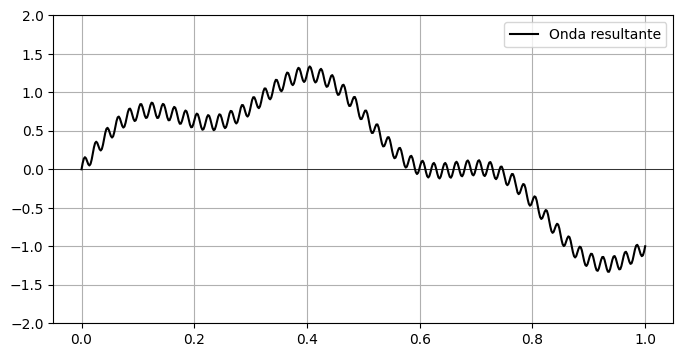

In [6]:
# Soma das ondas
y_values_soma = y_values1 + y_values2 + y_values3

# Gráfico
plt.figure(figsize=(8, 4))
plt.plot(x_values, y_values_soma, color='black', label='Onda resultante')
plt.grid(True)

plt.axhline(0, color='black', linewidth=0.5)

plt.legend()
plt.ylim(-2, 2)
plt.show()

#3. Decompondo o sinal - encontrando as frequências presentes no dado

*Transformada rápida de Fourier (FFT) dos dados*

A FFT, quando aplicada a dados no espaço (como é o nosso caso), irá calcula as componentes de frequência espacial (número de ciclos por metro, ou outra unidade espacial que esteja usando) e suas magnitudes (amplitudes).

In [7]:
# Transformada de Fourier da soma das ondas
fft_values = fft(y_values_soma)
n = len(x_values)
frequencias = fftfreq(n, d=(x_values[1] - x_values[0]))

Exibindo o gráfico da FFT completo

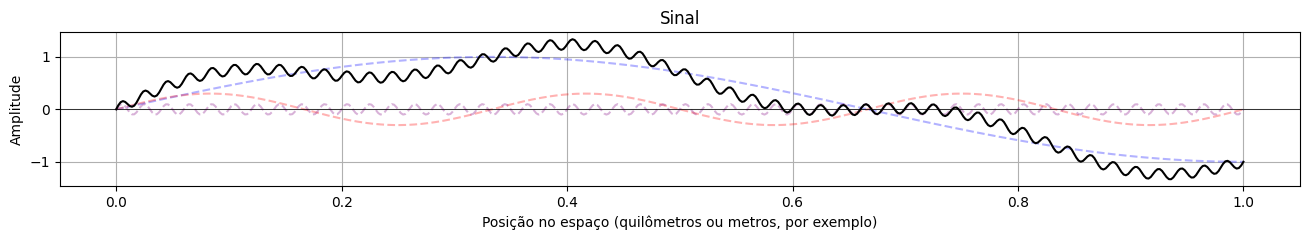

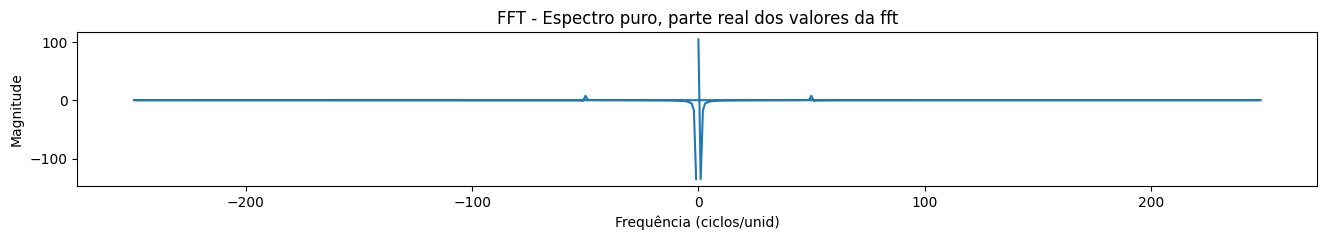

In [8]:
# Magnitude da FFT
fft_magnitude = fft_values.real

plt.figure(figsize=(16, 2))
plt.plot(x_values, y_values1, color='blue', linestyle='--', label='Onda 1', alpha=0.3)
plt.plot(x_values, y_values2, color='red', linestyle='--', label='Onda 2 ', alpha=0.3)
plt.plot(x_values, y_values3, color='purple', linestyle='--', label='Onda 3 ', alpha=0.3)
plt.plot(x_values, y_values_soma, color='black', label='Onda resultante', alpha=1)
plt.title("Sinal")
plt.xlabel("Posição no espaço (quilômetros ou metros, por exemplo)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

plt.figure(figsize=(16, 2))
plt.plot(frequencias, fft_magnitude)
plt.title('FFT - Espectro puro, parte real dos valores da fft')
plt.xlabel('Frequência (ciclos/unid)')
plt.ylabel('Magnitude')
plt.show()

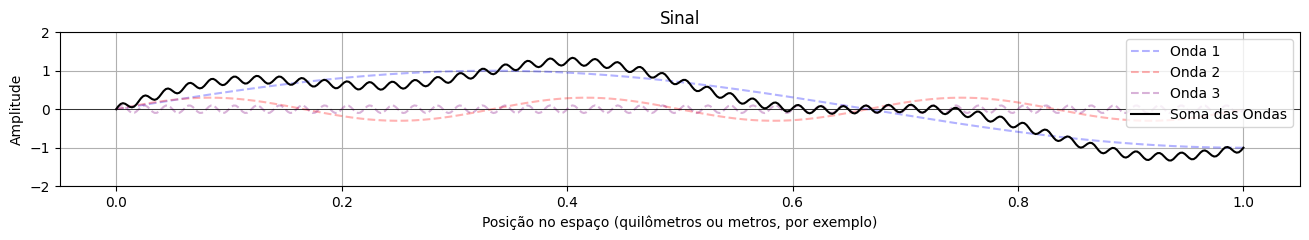

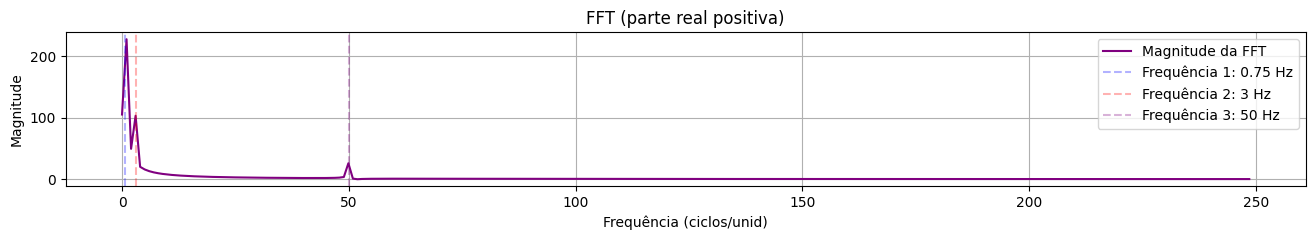

In [9]:
# Magnitude da FFT (apenas parte positiva)
fft_magnitude = np.abs(fft_values)[:n//2]
frequencias = frequencias[:n//2]

# Criando o gráfico com a adição de seta horizontal para representar λ
plt.figure(figsize=(16, 2))
plt.plot(x_values, y_values1, color='blue', linestyle='--', label='Onda 1', alpha=0.3)
plt.plot(x_values, y_values2, color='red', linestyle='--', label='Onda 2 ', alpha=0.3)
plt.plot(x_values, y_values3, color='purple', linestyle='--', label='Onda 3 ', alpha=0.3)
plt.plot(x_values, y_values_soma, color='black', label='Soma das Ondas', alpha=1)
plt.title("Sinal")
plt.xlabel("Posição no espaço (quilômetros ou metros, por exemplo)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.ylim(-2, 2)
plt.show()

# Gráfico no domínio da frequência
plt.figure(figsize=(16, 2))
plt.plot(frequencias, fft_magnitude, color='purple', label='Magnitude da FFT')
plt.title("FFT (parte real positiva)")
plt.xlabel("Frequência (ciclos/unid)")
plt.ylabel("Magnitude")
plt.grid(True)

# Indicar as frequências principais no gráfico
plt.axvline(frequencia1, color='blue', linestyle='--',  alpha=0.3, label=f'Frequência 1: {frequencia1} Hz')
plt.axvline(frequencia2, color='red', linestyle='--', alpha=0.3, label=f'Frequência 2: {frequencia2} Hz')
plt.axvline(frequencia3, color='purple', linestyle='--', alpha=0.3, label=f'Frequência 3: {frequencia3} Hz')

plt.legend()
plt.show()

# 3. Tratando dados reais no domínio da frequência
Dados reais de magnetometria em sítio controlado ([Bongiolo et al., 2022](https://www.sbgf.org.br/revista/index.php/rbgf/article/view/2132))

In [10]:
# Carregar dados do arquivo csv
file_path = 'https://raw.githubusercontent.com/lszam/ensino/main/controlled_sites_ufpr/mag/magniv_sitioufpr.csv'
dados = pd.read_csv(file_path)
dados.describe()

,X,Y,MAGNIV
count,4308.000000,4.308000e+03,4308.000000
mean,677781.085016,7.184165e+06,49.375727
std,6.827605,3.853058e+00,46.677797
min,677767.750000,7.184155e+06,-273.205139
25%,677775.250000,7.184162e+06,40.914846
50%,677781.125000,7.184164e+06,46.456047
75%,677787.000000,7.184167e+06,69.026957
max,677794.500000,7.184174e+06,265.398224


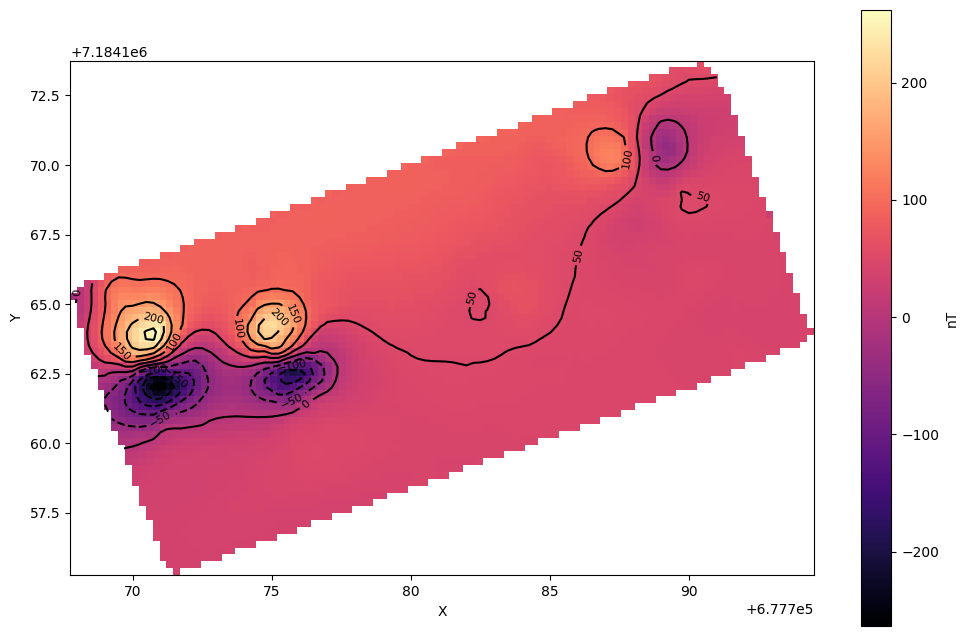

In [155]:
from scipy.interpolate import griddata

# Carregar dados do arquivo csv
file_path = 'https://raw.githubusercontent.com/lszam/ensino/main/controlled_sites_ufpr/mag/magniv_sitioufpr.csv'
dados = pd.read_csv(file_path)

x = dados['X'].values
y = dados['Y'].values
z = dados['MAGNIV'].values

# Obter os valores únicos de X e Y
x_unique = np.unique(dados['X'])
y_unique = np.unique(dados['Y'])

# Criar um grid fiel com base nesses valores únicos
grid_x, grid_y = np.meshgrid(x_unique, y_unique)

grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Plotando o mapa com isolinhas
plt.figure(figsize=(12, 8))
plt.imshow(grid_z, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower',
           cmap='magma', aspect='auto')
#plt.scatter(x, y, c=z, s=30, cmap='magma')
plt.colorbar(label='nT')

contours = plt.contour(grid_x, grid_y, grid_z, levels=12, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')

plt.gca().set_aspect('equal')
plt.show()


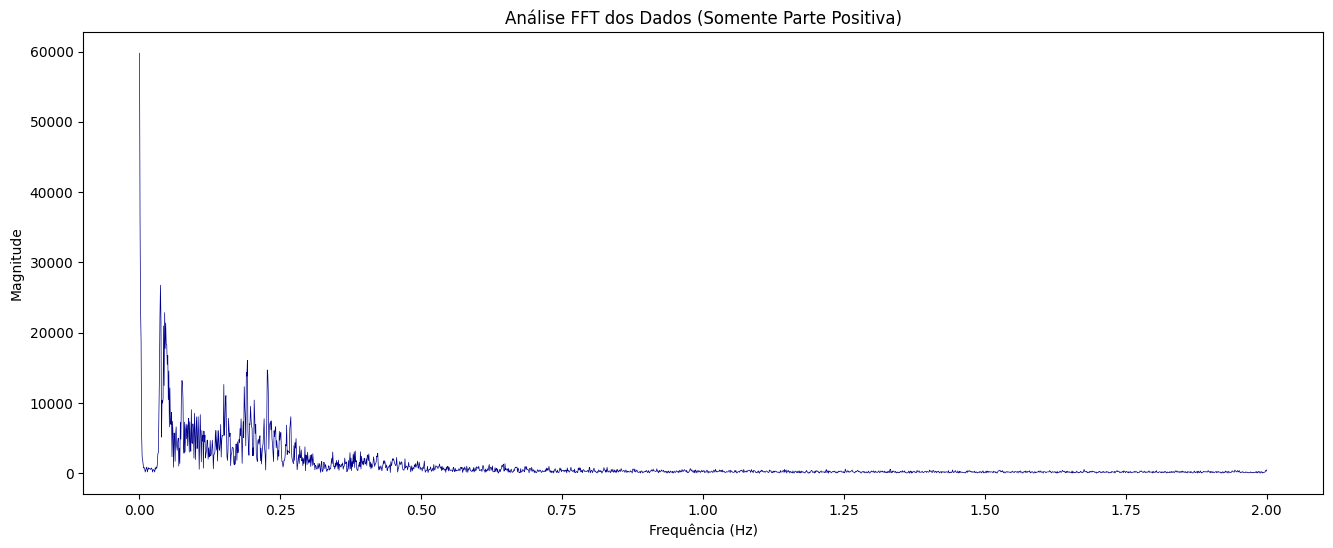

In [151]:
x_values = dados['X'].values
z_values = dados['MAGNIV'].values

# Número de pontos (n)
n = len(z_values)

# Registrar as frequencias e suas magnitudes com a FFT
dados_fft = fft(z_values)
frequencias = fftfreq(n, (x_values[1] - x_values[0]))
dados_frequencias = frequencias[n//2:]
dados_magnitudes = np.abs(dados_fft)[n//2:]

# Plotar o resultado da FFT
plt.figure(figsize=(16, 6))
plt.plot(dados_frequencias, dados_magnitudes, color='darkblue', linewidth=0.5)
plt.title('Análise FFT dos Dados (Somente Parte Positiva)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.show()

## **Pergunta 1**
>**O aspecto geral do gráfico de frequências do dado real é semelhante ao gráfico que estudamos antes, com ondas senóides? No que se assemelha e no que difere?**





In [ ]:
# ESCREVA SUA RESPOSTA AQUI!
#
#
#
#

Olhando para o gráfico, percebemos que há um "gap" entre as frequências mais baixas e de maior magnitude (extrema esquerda) e o restante do dado. Esta é a resposta de grande comprimento de onda dada pela influencia magnética de um grande estacionamento ao lado do local de estudo. Vamos cortar essa parte?

## Testando a exclusão de parte das frequências

*FILTRO PARA DEIXAR ALTAS FREQUÊNCIAS (FILTRO PASSA-ALTA)*

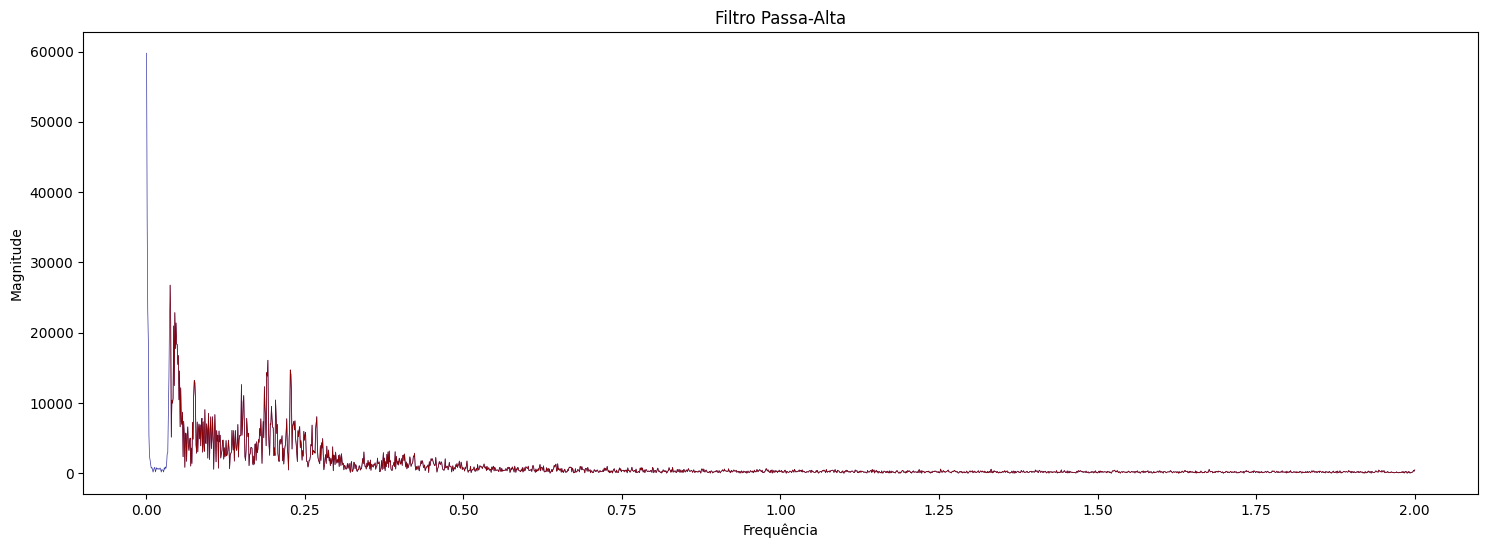

In [150]:
#CORTE PASSA-ALTA
cutoff = 0.038  # frequência de corte ("cut off")

n = len(dados['MAGNIV'])  # comprimento da série original de dados 'MAGNIV'
frequencias = np.fft.fftfreq(n, (dados['X'][1] - dados['X'][0])) #f percorre o dado seguindo o espaçamento em X
dados_fft = np.fft.fft(dados['MAGNIV'])

# Filtrar apenas as frequências positivas
frequencias_positivas = frequencias[n//2:]
magnitudes_positivas = np.abs(dados_fft[n//2:])

# Aplicar o cutoff nas frequências positivas
frequencias_validas = frequencias_positivas[frequencias_positivas >= cutoff]
magnitudes_validas = magnitudes_positivas[frequencias_positivas >= cutoff]

# Plotar a FFT filtrada com base no cutoff
plt.figure(figsize=(18, 6))
plt.plot(dados_frequencias, dados_magnitudes, color='darkblue', linewidth=0.5, alpha = 0.8)
plt.plot(frequencias_validas, magnitudes_validas, color='darkred', linewidth=0.5, alpha = 1)
plt.title('Filtro Passa-Alta')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')

#### plt.yscale('log') # escala log

plt.show()

Recuperar os dados no domínio do espaço com a transformada inversa (ifft)

In [152]:
dados_fft_filtrados = dados_fft.copy()
# Aplicar o filtro passa-alta zerando as frequências abaixo do cutoff
dados_fft_filtrados[np.abs(frequencias) < cutoff] = 0

# Uso da transformada inversa (iFFT) para obter os dados no domínio do espaço
dados_filtrados = np.fft.ifft(dados_fft_filtrados).real # apenas a parte real
dados_filtrados

# Criar um DataFrame com os dados filtrados e coordenadas
df_filtrados = pd.DataFrame({
    'Dados Filtrados': dados_filtrados.real,  # apenas a parte real dos dados filtrados
    'X': dados['X'],
    'Y': dados['Y']
})

# Organizar os dados filtrados em uma tabela 2D com base nas coordenadas originais X e Y
filtrados_reshape = df_filtrados.pivot_table(index='Y', columns='X', values='Dados Filtrados')
# pivot_table organiza os dados em uma tabela 2D, com base em X e Y, o que ajuda
# no uso do método imshow, dispensando o preenchimento dos pontos ausentes no grid.
# pivot_table preenche automaticamente os espaços vazios com NaN

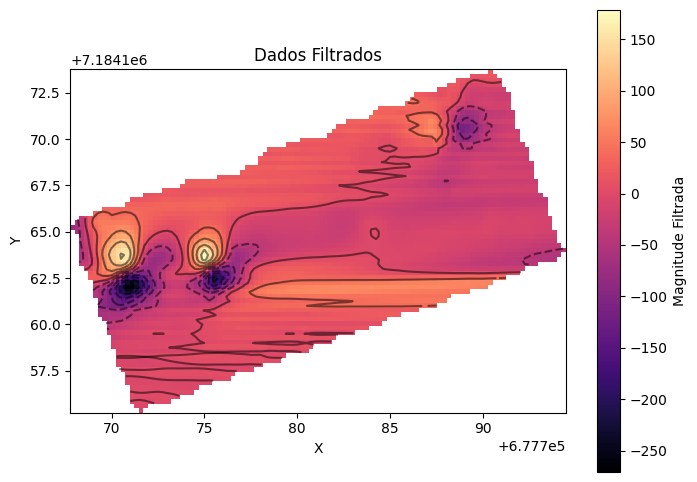

In [154]:
# Exibir os dados filtrados
plt.figure(figsize=(8, 6))
plt.imshow(filtrados_reshape, extent=(df_filtrados['X'].min(),
                                      df_filtrados['X'].max(),
                                      df_filtrados['Y'].min(),
                                      df_filtrados['Y'].max()),
                                      cmap='magma', aspect='auto', origin='lower')
plt.colorbar(label='Magnitude Filtrada')

plt.contour(filtrados_reshape, extent=(df_filtrados['X'].min(),
                                        df_filtrados['X'].max(),
                                        df_filtrados['Y'].min(),
                                        df_filtrados['Y'].max()),
                                        colors='black', levels=12, alpha=0.5)

plt.title('Dados Filtrados')
plt.xlabel('X')
plt.ylabel('Y')

plt.gca().set_aspect('equal')
plt.show()


### *FILTRO BUTTERWORTH*


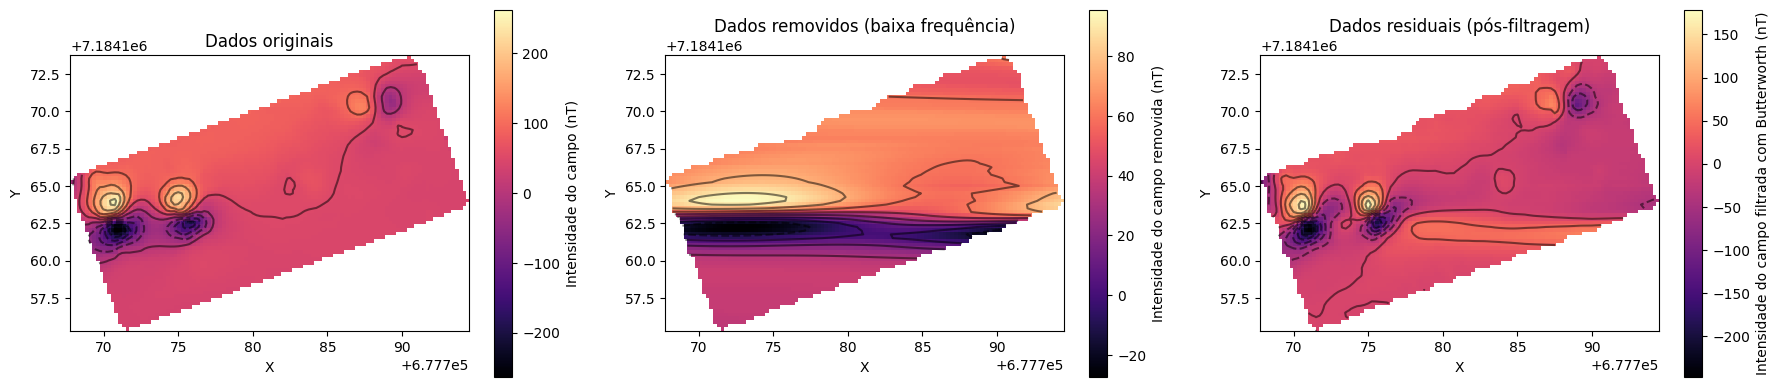

In [189]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt



#CORTE NA FREQUENCIA PARA O BUTTERWORTH
cutoff = 0.035  # Frequência de corte
order = 3  # Ordem do filtro




espacamento_X = dados['X'][1] - dados['X'][0]
fs = 1.0 / np.abs(espacamento_X)  # Taxa de amostragem baseada no espaçamento dos dados
nyq = 0.5 * fs  # Frequência de Nyquist, a metade da taxa de amostragem

# Verificar se o cutoff é válido
if cutoff <= 0 or cutoff >= nyq:
    raise ValueError(f"A frequência de corte deve ser maior que 0 e menor que a frequência de Nyquist ({nyq}).")

# Criar o filtro Butterworth passa-alta
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='high', analog=False)

# Aplicar o filtro Butterworth aos dados de 'MAGNIV'
dados_filtrados_butter = filtfilt(b, a, dados['MAGNIV'].values)

# Calcular os dados cortados (baixa frequência removida)
dados_cortados = dados['MAGNIV'].values - dados_filtrados_butter

# Atualizar o DataFrame 'df_filtrados' com os dados filtrados pelo Butterworth e os dados cortados
df_filtrados['Butterworth'] = dados_filtrados_butter
df_filtrados['Cortados'] = dados_cortados

# Organizar os dados filtrados e cortados em tabelas 2D com base nas coordenadas originais X e Y
filtrados_pivot = df_filtrados.pivot_table(index='Y', columns='X', values='Butterworth')
cortados_pivot = df_filtrados.pivot_table(index='Y', columns='X', values='Cortados')

# Exibir os dados
plt.figure(figsize=(18, 4))

# Subplot 1: Dados originais
plt.subplot(1, 3, 1)
plt.imshow(grid_z, extent=(dados['X'].min(),
                           dados['X'].max(),
                           dados['Y'].min(),
                           dados['Y'].max()),
                           cmap='magma', aspect='auto', origin='lower')
plt.colorbar(label='Intensidade do campo (nT)')
plt.contour(grid_z, extent=(dados['X'].min(),
                            dados['X'].max(),
                            dados['Y'].min(),
                            dados['Y'].max()),
                            colors='black', levels=10, alpha=0.5)
plt.title('Dados originais')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')

# Subplot 2: Dados cortados (baixa frequência removida)
plt.subplot(1, 3, 2)
plt.imshow(cortados_pivot, extent=(df_filtrados['X'].min(),
                                   df_filtrados['X'].max(),
                                   df_filtrados['Y'].min(),
                                   df_filtrados['Y'].max()),
                                   cmap='magma', aspect='auto', origin='lower')
plt.colorbar(label='Intensidade do campo removida (nT)')
plt.contour(cortados_pivot, extent=(df_filtrados['X'].min(),
                                    df_filtrados['X'].max(),
                                    df_filtrados['Y'].min(),
                                    df_filtrados['Y'].max()),
                                    colors='black', levels=10, alpha=0.5)
plt.title('Dados removidos (baixa frequência)')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')




# Subplot 3: Dados filtrados com Butterworth
plt.subplot(1, 3, 3)
plt.imshow(filtrados_pivot, extent=(df_filtrados['X'].min(),
                                    df_filtrados['X'].max(),
                                    df_filtrados['Y'].min(),
                                    df_filtrados['Y'].max()),
                                    cmap='magma', aspect='auto', origin='lower')
plt.colorbar(label='Intensidade do campo filtrada com Butterworth (nT)')
plt.contour(filtrados_pivot, extent=(df_filtrados['X'].min(),
                                     df_filtrados['X'].max(),
                                     df_filtrados['Y'].min(),
                                     df_filtrados['Y'].max()),
                                     colors='black', levels=10, alpha=0.5)
plt.title('Dados residuais (pós-filtragem)')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()


# **Enviar atividade (ao final da aula)**
Execute a célula abaixo para enviar

In [185]:
!pip install nbconvert nbformat -q
!apt-get install -y pandoc

import nbformat
from nbconvert import PDFExporter
import base64
import requests
import json
from google.colab import _message
import os
import re

# Função para remover imagens externas das células de markdown
def remove_external_images(notebook_content):
    for cell in notebook_content['cells']:
        if cell['cell_type'] == 'markdown':
            # Procurar imagens externas usando regex
            cell['source'] = re.sub(r'!\[.*?\]\(http.*?\)', '', cell['source'])
    return notebook_content

# Nome do notebook
notebook_filename = 'GAI_20240911_Ondas_DomínioDaFrequencia.ipynb'  # Substitua pelo nome correto do seu notebook

# Caminho completo do notebook no Google Drive
notebook_path = f'/content/drive/My Drive/Colab Notebooks/{notebook_filename}'

# Verifica se o notebook existe no caminho do Google Drive
if os.path.exists(notebook_path):
    # Carrega o notebook
    with open(notebook_path) as f:
        notebook_content = nbformat.read(f, as_version=4)

    # Remover imagens externas do conteúdo do notebook
    notebook_content = remove_external_images(notebook_content)

    # Converte o notebook em PDF
    pdf_exporter = PDFExporter()
    pdf_data, resources = pdf_exporter.from_notebook_node(notebook_content)

    # Salva o PDF gerado
    pdf_filename = notebook_filename.replace('.ipynb', '.pdf')
    pdf_path = f'/content/drive/My Drive/Colab Notebooks/{pdf_filename}'
    with open(pdf_path, 'wb') as f:
        f.write(pdf_data)

    print(f"Notebook exportado como PDF com sucesso em {pdf_path}!")
else:
    print("Notebook não encontrado.")



# Função para enviar o email via Google Apps Script
def send_email_via_script(recipient_email, subject, body, notebook_path):
    # Verifica se o arquivo foi salvo corretamente
    if not os.path.exists(pdf_path):
        print(f"Erro: O arquivo {pdf_path} não foi encontrado.")
        return

    # Lê o arquivo do notebook
    with open(pdf_path, 'rb') as f:
        pdf_data = f.read()

    # Verifica o tamanho do arquivo e se foi lido corretamente
    if len(pdf_data) == 0:
        print("Erro: O arquivo está vazio.")
        return

    pdf_base64 = base64.b64encode(pdf_data).decode('utf-8')

    # Verifica o tamanho do conteúdo codificado
    if len(pdf_base64) == 0:
        print("Erro: Falha na codificação do arquivo.")
        return

    # URL do Google Apps Script
    url = 'https://script.google.com/macros/s/AKfycbyZ5qDM_WTP27n2XaxkOhfeMpp4cePpg_Y8YIqP855rnBnoLe9rGdNnXthx4mBLQW81/exec'

    # Dados enviados para o Google Apps Script
    data = {
        'recipient': recipient_email,
        'subject': subject,
        'body': body,
        'attachmentName': notebook_path.split('/')[-1],
        'attachmentContent': pdf_base64
    }
    # Enviar requisição POST
    response = requests.post(url, data=data)
    # Exibe a resposta para depuração
    print("Resposta do servidor:", response.text)

# Nome do notebook
#notebook_name = 'notebook_aluno_'+ aluno
notebook_name = atividade + '_' + aluno

# Configuração para enviar o notebook
recipient_email = 'luizemara@gmail.com'
subject = 'IGc-USP Atividades de alunos - ' + aluno +"_"+ atividade
body = 'Atividade concluída - notebook anexado.'

# Enviar o email
send_email_via_script(recipient_email, subject, body, notebook_path)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Notebook exportado como PDF com sucesso em /content/drive/My Drive/Colab Notebooks/GAI_20240911_Ondas_DomínioDaFrequencia.pdf!
Resposta do servidor: Email sent successfully.
